# Question 1

In [2]:
import pandas as pd

books = pd.read_csv("D:\\360DigiTMG\\DataScience\\13. Data mining Unsupervised learning - Association Rules\\Assignment\\book.csv")
books.head()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [11]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items = apriori(books, min_support=0.0075, max_len=4, use_colnames=True)
frequent_items

C:\Users\riten\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                 itemsets
0     0.4230                               (ChildBks)
1     0.2475                               (YouthBks)
2     0.4310                                (CookBks)
3     0.2820                               (DoItYBks)
4     0.2145                                 (RefBks)
..       ...                                      ...
461   0.0090     (GeogBks, Florence, ArtBks, ItalArt)
462   0.0125   (ItalCook, ItalArt, ArtBks, ItalAtlas)
463   0.0095    (Florence, ItalCook, ArtBks, ItalArt)
464   0.0090  (GeogBks, ItalCook, ItalArt, ItalAtlas)
465   0.0075   (Florence, ItalCook, GeogBks, ItalArt)

[466 rows x 2 columns]

In [12]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules

antecedents                    consequents  antecedent support  \
0             (ChildBks)                     (YouthBks)              0.4230   
1             (YouthBks)                     (ChildBks)              0.2475   
2             (ChildBks)                      (CookBks)              0.4230   
3              (CookBks)                     (ChildBks)              0.4310   
4             (ChildBks)                     (DoItYBks)              0.4230   
...                  ...                            ...                 ...   
4481  (GeogBks, ItalArt)           (Florence, ItalCook)              0.0295   
4482          (Florence)   (GeogBks, ItalArt, ItalCook)              0.1085   
4483          (ItalCook)   (Florence, GeogBks, ItalArt)              0.1135   
4484           (GeogBks)  (Florence, ItalArt, ItalCook)              0.2760   
4485           (ItalArt)  (Florence, GeogBks, ItalCook)              0.0485   

      consequent support  support  confidence       lift  leverage  conviction  
0                 0.2475   0.1650    0.390071   1.576044  0.060308    1.233750  
1                 0.4230   0.1650    0.666667   1.576044  0.060308    1.731000  
2                 0.4310   0.2560    0.605201   1.404179  0.073687    1.441240  
3                 0.4230   0.2560    0.593968   1.404179  0.073687    1.421069  
4                 0.2820   0.1840    0.434988   1.542511  0.064714    1.270770  
...                  ...      ...         ...        ...       ...         ...  
4481              0.0175   0.0075    0.254237  14.527845  0.006984    1.317443  
4482              0.0240   0.0075    0.069124   2.880184  0.004896    1.048475  
4483              0.0090   0.0075    0.066079   7.342144  0.006478    1.061118  
4484              0.0095   0.0075    0.027174   2.860412  0.004878    1.018168  
4485              0.0130   0.0075    0.154639  11.895321  0.006869    1.167549  

[4486 rows x 9 columns]

In [16]:
# Extra steps

def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
ma_X

0                         [ChildBks, YouthBks]
1                         [YouthBks, ChildBks]
2                          [ChildBks, CookBks]
3                          [CookBks, ChildBks]
4                         [ChildBks, DoItYBks]
                         ...                  
4481    [GeogBks, ItalArt, Florence, ItalCook]
4482    [Florence, GeogBks, ItalArt, ItalCook]
4483    [ItalCook, Florence, GeogBks, ItalArt]
4484    [GeogBks, Florence, ItalArt, ItalCook]
4485    [ItalArt, Florence, GeogBks, ItalCook]
Length: 4486, dtype: object

In [19]:
ma_X.apply(sorted)
ma_X

0                         [ChildBks, YouthBks]
1                         [YouthBks, ChildBks]
2                          [ChildBks, CookBks]
3                          [CookBks, ChildBks]
4                         [ChildBks, DoItYBks]
                         ...                  
4481    [GeogBks, ItalArt, Florence, ItalCook]
4482    [Florence, GeogBks, ItalArt, ItalCook]
4483    [ItalCook, Florence, GeogBks, ItalArt]
4484    [GeogBks, Florence, ItalArt, ItalCook]
4485    [ItalArt, Florence, GeogBks, ItalCook]
Length: 4486, dtype: object

In [21]:
rule_sets = list(ma_X)
rule_sets

[['ChildBks', 'YouthBks'],
 ['YouthBks', 'ChildBks'],
 ['ChildBks', 'CookBks'],
 ['CookBks', 'ChildBks'],
 ['ChildBks', 'DoItYBks'],
 ['DoItYBks', 'ChildBks'],
 ['ChildBks', 'RefBks'],
 ['RefBks', 'ChildBks'],
 ['ChildBks', 'ArtBks'],
 ['ArtBks', 'ChildBks'],
 ['ChildBks', 'GeogBks'],
 ['GeogBks', 'ChildBks'],
 ['ChildBks', 'ItalCook'],
 ['ItalCook', 'ChildBks'],
 ['ChildBks', 'ItalAtlas'],
 ['ItalAtlas', 'ChildBks'],
 ['ChildBks', 'ItalArt'],
 ['ItalArt', 'ChildBks'],
 ['ChildBks', 'Florence'],
 ['Florence', 'ChildBks'],
 ['YouthBks', 'CookBks'],
 ['CookBks', 'YouthBks'],
 ['YouthBks', 'DoItYBks'],
 ['DoItYBks', 'YouthBks'],
 ['YouthBks', 'RefBks'],
 ['RefBks', 'YouthBks'],
 ['YouthBks', 'ArtBks'],
 ['ArtBks', 'YouthBks'],
 ['GeogBks', 'YouthBks'],
 ['YouthBks', 'GeogBks'],
 ['YouthBks', 'ItalCook'],
 ['ItalCook', 'YouthBks'],
 ['YouthBks', 'ItalAtlas'],
 ['ItalAtlas', 'YouthBks'],
 ['YouthBks', 'ItalArt'],
 ['ItalArt', 'YouthBks'],
 ['DoItYBks', 'CookBks'],
 ['CookBks', 'DoItYBks'],


In [22]:
len(rule_sets)

4486

In [27]:
unique_rule_sets = [list(i) for i in set(tuple(j) for j in rule_sets)]
len(unique_rule_sets)

3838

In [29]:
index_rules = []
for i in unique_rule_sets:
    index_rules.append(rule_sets.index(i))
index_rules

[1773,
 338,
 3853,
 4255,
 1368,
 2775,
 2189,
 675,
 3891,
 4299,
 2272,
 614,
 3752,
 4042,
 59,
 2761,
 2765,
 3221,
 802,
 41,
 380,
 465,
 2227,
 1330,
 1724,
 1259,
 1947,
 3828,
 1173,
 2613,
 325,
 52,
 1771,
 759,
 3302,
 4013,
 2170,
 1914,
 3604,
 349,
 363,
 1238,
 4126,
 4411,
 2715,
 2151,
 2254,
 4070,
 3736,
 662,
 72,
 3773,
 2912,
 3831,
 2964,
 1353,
 926,
 825,
 3675,
 3010,
 1867,
 4149,
 404,
 4370,
 1383,
 2807,
 2699,
 61,
 485,
 2719,
 1827,
 1628,
 2884,
 3051,
 2269,
 4461,
 2044,
 105,
 3566,
 576,
 1953,
 2203,
 2743,
 4198,
 3396,
 3594,
 1613,
 158,
 3570,
 255,
 3842,
 1681,
 4121,
 1854,
 4058,
 4308,
 27,
 2054,
 3509,
 4106,
 2361,
 4248,
 1485,
 2443,
 2585,
 4425,
 3252,
 2487,
 423,
 1501,
 2206,
 2979,
 2165,
 4030,
 437,
 3414,
 822,
 849,
 872,
 2015,
 3136,
 258,
 1581,
 3561,
 2659,
 1739,
 3693,
 3970,
 1625,
 3996,
 2016,
 321,
 4459,
 1377,
 3162,
 772,
 394,
 3255,
 29,
 1641,
 4245,
 1085,
 2676,
 1473,
 2641,
 674,
 451,
 1163,
 3782,
 

In [32]:
redundant_rule_sets = rules.iloc[index_rules, :]
redundant_rule_sets

antecedents                  consequents  \
1773      (GeogBks, ItalArt, CookBks)                   (ChildBks)   
338              (ChildBks, ItalCook)                  (ItalAtlas)   
3853                       (ItalCook)  (GeogBks, ItalArt, CookBks)   
4255              (Florence, GeogBks)             (RefBks, ArtBks)   
1368             (ChildBks, YouthBks)            (ArtBks, ItalArt)   
...                               ...                          ...   
3691     (RefBks, ItalAtlas, CookBks)                    (ItalArt)   
1012               (GeogBks, ItalArt)                   (Florence)   
4481               (GeogBks, ItalArt)         (Florence, ItalCook)   
2079  (ChildBks, ItalAtlas, ItalCook)                   (DoItYBks)   
4417     (GeogBks, Florence, ItalArt)                     (ArtBks)   

      antecedent support  consequent support  support  confidence       lift  \
1773              0.0250              0.4230   0.0190    0.760000   1.796690   
338               0.0850              0.0370   0.0200    0.235294   6.359300   
3853              0.1135              0.0250   0.0240    0.211454   8.458150   
4255              0.0425              0.0895   0.0145    0.341176   3.812028   
1368              0.1650              0.0485   0.0175    0.106061   2.186817   
...                  ...                 ...      ...         ...        ...   
3691              0.0285              0.0485   0.0130    0.456140   9.404956   
1012              0.0295              0.1085   0.0090    0.305085   2.811841   
4481              0.0295              0.0175   0.0075    0.254237  14.527845   
2079              0.0200              0.2820   0.0110    0.550000   1.950355   
4417              0.0090              0.2410   0.0090    1.000000   4.149378   

      leverage  conviction  
1773  0.008425    2.404167  
338   0.016855    1.259308  
3853  0.021163    1.236453  
4255  0.010696    1.382009  
1368  0.009498    1.064390  
...        ...         ...  
3691  0.011618    1.749532  
1012  0.005799    1.282890  
4481  0.006984    1.317443  
2079  0.005360    1.595556  
4417  0.006831         inf  

[3838 rows x 9 columns]

In [34]:
redundant_rule_sets.sort_values('lift', ascending=False).head()

antecedents           consequents  antecedent support  \
4297      (RefBks, ItalArt)   (ArtBks, ItalAtlas)              0.0200   
4296    (ArtBks, ItalAtlas)     (RefBks, ItalArt)              0.0180   
4338   (GeogBks, ItalAtlas)     (RefBks, ItalArt)              0.0205   
4339      (RefBks, ItalArt)  (GeogBks, ItalAtlas)              0.0200   
4352  (ItalAtlas, ItalCook)     (RefBks, ItalArt)              0.0230   

      consequent support  support  confidence       lift  leverage  conviction  
4297              0.0180   0.0165    0.825000  45.833333   0.01614    5.611429  
4296              0.0200   0.0165    0.916667  45.833333   0.01614   11.760000  
4338              0.0200   0.0115    0.560976  28.048780   0.01109    2.232222  
4339              0.0205   0.0115    0.575000  28.048780   0.01109    2.304706  
4352              0.0200   0.0125    0.543478  27.173913   0.01204    2.146667

Conclusion: This is the ultimate association that shop can apply for sale and offer.

# Question 2

In [43]:
groceries_list = []
with open("D:\\360DigiTMG\\DataScience\\13. Data mining Unsupervised learning - Association Rules\\Assignment\\groceries.csv") as f:
    groceries_list = f.read()
groceries_list

'citrus fruit,semi-finished bread,margarine,ready soups\ntropical fruit,yogurt,coffee\nwhole milk\npip fruit,yogurt,cream cheese ,meat spreads\nother vegetables,whole milk,condensed milk,long life bakery product\nwhole milk,butter,yogurt,rice,abrasive cleaner\nrolls/buns\nother vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)\npot plants\nwhole milk,cereals\ntropical fruit,other vegetables,white bread,bottled water,chocolate\ncitrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes\nbeef\nfrankfurter,rolls/buns,soda\nchicken,tropical fruit\nbutter,sugar,fruit/vegetable juice,newspapers\nfruit/vegetable juice\npackaged fruit/vegetables\nchocolate\nspecialty bar\nother vegetables\nbutter milk,pastry\nwhole milk\ntropical fruit,cream cheese ,processed cheese,detergent,newspapers\ntropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,salty snack,waffles,candy,bathroom cleaner\nbottled water,canned beer\nyogur

In [44]:
groceries_list = groceries_list.split("\n")
groceries_list

['citrus fruit,semi-finished bread,margarine,ready soups',
 'tropical fruit,yogurt,coffee',
 'whole milk',
 'pip fruit,yogurt,cream cheese ,meat spreads',
 'other vegetables,whole milk,condensed milk,long life bakery product',
 'whole milk,butter,yogurt,rice,abrasive cleaner',
 'rolls/buns',
 'other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)',
 'pot plants',
 'whole milk,cereals',
 'tropical fruit,other vegetables,white bread,bottled water,chocolate',
 'citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes',
 'beef',
 'frankfurter,rolls/buns,soda',
 'chicken,tropical fruit',
 'butter,sugar,fruit/vegetable juice,newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk,pastry',
 'whole milk',
 'tropical fruit,cream cheese ,processed cheese,detergent,newspapers',
 'tropical fruit,root vegetables,other vegetables,frozen dessert,rolls/buns,flour,sweet spreads,sal

In [46]:
groceries_list_list = []
for i in groceries_list:
    groceries_list_list.append(i.split(","))
groceries_list_list

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [50]:
all_groceries = [i for item in groceries_list_list for i in item]
all_groceries

['citrus fruit',
 'semi-finished bread',
 'margarine',
 'ready soups',
 'tropical fruit',
 'yogurt',
 'coffee',
 'whole milk',
 'pip fruit',
 'yogurt',
 'cream cheese ',
 'meat spreads',
 'other vegetables',
 'whole milk',
 'condensed milk',
 'long life bakery product',
 'whole milk',
 'butter',
 'yogurt',
 'rice',
 'abrasive cleaner',
 'rolls/buns',
 'other vegetables',
 'UHT-milk',
 'rolls/buns',
 'bottled beer',
 'liquor (appetizer)',
 'pot plants',
 'whole milk',
 'cereals',
 'tropical fruit',
 'other vegetables',
 'white bread',
 'bottled water',
 'chocolate',
 'citrus fruit',
 'tropical fruit',
 'whole milk',
 'butter',
 'curd',
 'yogurt',
 'flour',
 'bottled water',
 'dishes',
 'beef',
 'frankfurter',
 'rolls/buns',
 'soda',
 'chicken',
 'tropical fruit',
 'butter',
 'sugar',
 'fruit/vegetable juice',
 'newspapers',
 'fruit/vegetable juice',
 'packaged fruit/vegetables',
 'chocolate',
 'specialty bar',
 'other vegetables',
 'butter milk',
 'pastry',
 'whole milk',
 'tropical fru

In [65]:
from collections import Counter

item_f = Counter(all_groceries)
item_f

Counter({'citrus fruit': 814,
         'semi-finished bread': 174,
         'margarine': 576,
         'ready soups': 18,
         'tropical fruit': 1032,
         'yogurt': 1372,
         'coffee': 571,
         'whole milk': 2513,
         'pip fruit': 744,
         'cream cheese ': 390,
         'meat spreads': 42,
         'other vegetables': 1903,
         'condensed milk': 101,
         'long life bakery product': 368,
         'butter': 545,
         'rice': 75,
         'abrasive cleaner': 35,
         'rolls/buns': 1809,
         'UHT-milk': 329,
         'bottled beer': 792,
         'liquor (appetizer)': 78,
         'pot plants': 170,
         'cereals': 56,
         'white bread': 414,
         'bottled water': 1087,
         'chocolate': 488,
         'curd': 524,
         'flour': 171,
         'dishes': 173,
         'beef': 516,
         'frankfurter': 580,
         'soda': 1715,
         'chicken': 422,
         'sugar': 333,
         'fruit/vegetable juice': 711,
   

In [66]:
item_f = sorted(item_f.items(), key=lambda x:x[1], reverse=True)
item_f

[('whole milk', 2513),
 ('other vegetables', 1903),
 ('rolls/buns', 1809),
 ('soda', 1715),
 ('yogurt', 1372),
 ('bottled water', 1087),
 ('root vegetables', 1072),
 ('tropical fruit', 1032),
 ('shopping bags', 969),
 ('sausage', 924),
 ('pastry', 875),
 ('citrus fruit', 814),
 ('bottled beer', 792),
 ('newspapers', 785),
 ('canned beer', 764),
 ('pip fruit', 744),
 ('fruit/vegetable juice', 711),
 ('whipped/sour cream', 705),
 ('brown bread', 638),
 ('domestic eggs', 624),
 ('frankfurter', 580),
 ('margarine', 576),
 ('coffee', 571),
 ('pork', 567),
 ('butter', 545),
 ('curd', 524),
 ('beef', 516),
 ('napkins', 515),
 ('chocolate', 488),
 ('frozen vegetables', 473),
 ('chicken', 422),
 ('white bread', 414),
 ('cream cheese ', 390),
 ('waffles', 378),
 ('salty snack', 372),
 ('long life bakery product', 368),
 ('dessert', 365),
 ('sugar', 333),
 ('UHT-milk', 329),
 ('hamburger meat', 327),
 ('berries', 327),
 ('hygiene articles', 324),
 ('onions', 305),
 ('specialty chocolate', 299),
 

In [68]:
import matplotlib.pyplot as plt

item = list(i[0] for i in item_f)
item

['whole milk',
 'other vegetables',
 'rolls/buns',
 'soda',
 'yogurt',
 'bottled water',
 'root vegetables',
 'tropical fruit',
 'shopping bags',
 'sausage',
 'pastry',
 'citrus fruit',
 'bottled beer',
 'newspapers',
 'canned beer',
 'pip fruit',
 'fruit/vegetable juice',
 'whipped/sour cream',
 'brown bread',
 'domestic eggs',
 'frankfurter',
 'margarine',
 'coffee',
 'pork',
 'butter',
 'curd',
 'beef',
 'napkins',
 'chocolate',
 'frozen vegetables',
 'chicken',
 'white bread',
 'cream cheese ',
 'waffles',
 'salty snack',
 'long life bakery product',
 'dessert',
 'sugar',
 'UHT-milk',
 'hamburger meat',
 'berries',
 'hygiene articles',
 'onions',
 'specialty chocolate',
 'candy',
 'misc. beverages',
 'frozen meals',
 'oil',
 'butter milk',
 'specialty bar',
 'beverages',
 'ham',
 'meat',
 'ice cream',
 'hard cheese',
 'sliced cheese',
 'cat food',
 'grapes',
 'chewing gum',
 'detergent',
 'red/blush wine',
 'white wine',
 'pickled vegetables',
 'semi-finished bread',
 'baking powde

In [70]:
f = list(j[1] for j in item_f)
f

[2513,
 1903,
 1809,
 1715,
 1372,
 1087,
 1072,
 1032,
 969,
 924,
 875,
 814,
 792,
 785,
 764,
 744,
 711,
 705,
 638,
 624,
 580,
 576,
 571,
 567,
 545,
 524,
 516,
 515,
 488,
 473,
 422,
 414,
 390,
 378,
 372,
 368,
 365,
 333,
 329,
 327,
 327,
 324,
 305,
 299,
 294,
 279,
 279,
 276,
 275,
 269,
 256,
 256,
 254,
 246,
 241,
 241,
 229,
 220,
 207,
 189,
 189,
 187,
 176,
 174,
 174,
 173,
 171,
 170,
 168,
 163,
 160,
 148,
 148,
 140,
 130,
 128,
 118,
 115,
 112,
 110,
 109,
 106,
 106,
 106,
 103,
 102,
 101,
 101,
 93,
 91,
 90,
 89,
 89,
 88,
 84,
 84,
 83,
 82,
 80,
 79,
 78,
 75,
 73,
 71,
 68,
 67,
 64,
 64,
 60,
 59,
 57,
 56,
 55,
 54,
 54,
 53,
 51,
 50,
 50,
 50,
 45,
 44,
 42,
 42,
 41,
 41,
 38,
 36,
 35,
 35,
 33,
 32,
 32,
 32,
 31,
 30,
 29,
 28,
 27,
 27,
 26,
 25,
 23,
 23,
 22,
 22,
 20,
 19,
 18,
 17,
 16,
 15,
 15,
 13,
 12,
 11,
 10,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 4,
 4,
 2,
 1,
 1,
 1]

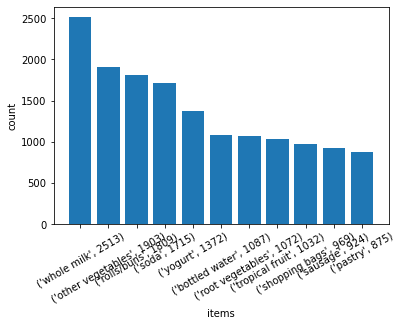

In [73]:
plt.xticks(list(range(0, 11), ), item_f[0:11], rotation=30)
plt.xlabel("items")
plt.ylabel("count")
plt.bar(height = f[0:11], x = list(range(0, 11)))
plt.show()

In [77]:
groceries_series = pd.DataFrame(pd.Series(groceries_list_list))
groceries_series.columns = ["transaction"]
groceries_series.head()

transaction
0  [citrus fruit, semi-finished bread, margarine,...
1                   [tropical fruit, yogurt, coffee]
2                                       [whole milk]
3   [pip fruit, yogurt, cream cheese , meat spreads]
4  [other vegetables, whole milk, condensed milk,...

In [78]:
X = groceries_series.transaction.str.join("*").str.get_dummies(sep = "*")
X

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                         0         0                 0                 0   
1                         0         0                 0                 0   
2                         0         0                 0                 0   
3                         0         0                 0                 0   
4                         0         0                 0                 0   
...                     ...       ...               ...               ...   
9831                      0         0                 0                 0   
9832                      0         0                 0                 0   
9833                      0         0                 0                 0   
9834                      0         0                 0                 0   
9835                      0         0                 0                 0   

      baby cosmetics  baby food  bags  baking powder  bathroom cleaner  beef  \
0                  0          0     0              0                 0     0   
1                  0          0     0              0                 0     0   
2                  0          0     0              0                 0     0   
3                  0          0     0              0                 0     0   
4                  0          0     0              0                 0     0   
...              ...        ...   ...            ...               ...   ...   
9831               0          0     0              0                 0     0   
9832               0          0     0              0                 0     0   
9833               0          0     0              0                 0     0   
9834               0          0     0              0                 0     0   
9835               0          0     0              0                 0     0   

      ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0     ...       0        0        0                   0       0            0   
1     ...       0        0        0                   0       0            0   
2     ...       0        0        0                   0       0            0   
3     ...       0        0        0                   0       0            0   
4     ...       0        0        0                   0       0            0   
...   ...     ...      ...      ...                 ...     ...          ...   
9831  ...       0        0        0                   0       0            0   
9832  ...       0        0        0                   0       0            0   
9833  ...       0        0        0                   0       0            0   
9834  ...       0        1        0                   0       0            0   
9835  ...       0        0        0                   0       0            0   

      white wine  whole milk  yogurt  zwieback  
0              0           0       0         0  
1              0           0       1         0  
2              0           1       0         0  
3              0           0       1         0  
4              0           1       0         0  
...          ...         ...     ...       ...  
9831           0           0       0         0  
9832           0           0       1         0  
9833           0           0       0         0  
9834           0           0       0         0  
9835           0           0       0         0  

[9836 rows x 169 columns]

In [88]:
from mlxtend.frequent_patterns import apriori, association_rules

g_a = apriori(X, min_support=0.0075, max_len=4, use_colnames=True)
g_a

C:\Users\riten\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                           itemsets
0    0.008032                            (Instant food products)
1    0.033449                                         (UHT-milk)
2    0.017690                                    (baking powder)
3    0.052460                                             (beef)
4    0.033245                                          (berries)
..        ...                                                ...
526  0.007930   (whipped/sour cream, tropical fruit, whole milk)
527  0.015148               (tropical fruit, whole milk, yogurt)
528  0.010878           (whipped/sour cream, whole milk, yogurt)
529  0.007828  (whole milk, other vegetables, root vegetables...
530  0.007625  (tropical fruit, other vegetables, whole milk,...

[531 rows x 2 columns]

In [90]:
g_association = association_rules(g_a, metric="lift", min_threshold=1)
g_association

antecedents                                     consequents  \
0       (other vegetables)                                      (UHT-milk)   
1               (UHT-milk)                              (other vegetables)   
2                   (soda)                                      (UHT-milk)   
3               (UHT-milk)                                          (soda)   
4             (whole milk)                                 (baking powder)   
...                    ...                                             ...   
1193  (whole milk, yogurt)              (tropical fruit, other vegetables)   
1194      (tropical fruit)          (whole milk, other vegetables, yogurt)   
1195    (other vegetables)            (tropical fruit, whole milk, yogurt)   
1196          (whole milk)      (tropical fruit, other vegetables, yogurt)   
1197              (yogurt)  (whole milk, tropical fruit, other vegetables)   

      antecedent support  consequent support   support  confidence      lift  \
0               0.193473            0.033449  0.008133    0.042039  1.256822   
1               0.033449            0.193473  0.008133    0.243161  1.256822   
2               0.174359            0.033449  0.007625    0.043732  1.307434   
3               0.033449            0.174359  0.007625    0.227964  1.307434   
4               0.255490            0.017690  0.009252    0.036212  2.047002   
...                  ...                 ...       ...         ...       ...   
1193            0.056019            0.035889  0.007625    0.136116  3.792744   
1194            0.104921            0.022265  0.007625    0.072674  3.264044   
1195            0.193473            0.015148  0.007625    0.039411  2.601685   
1196            0.255490            0.012302  0.007625    0.029845  2.426062   
1197            0.139488            0.017080  0.007625    0.054665  3.200489   

      leverage  conviction  
0     0.001662    1.008967  
1     0.001662    1.065652  
2     0.001793    1.010753  
3     0.001793    1.069432  
4     0.004732    1.019217  
...        ...         ...  
1193  0.005615    1.116020  
1194  0.005289    1.054360  
1195  0.004694    1.025258  
1196  0.004482    1.018083  
1197  0.005243    1.039758  

[1198 rows x 9 columns]

<b>Conclution</b>: With this lift column they can use the associated offers in the groceries

# Question 3

In [92]:
import pandas as pd

my_movies = pd.read_csv("D:\\360DigiTMG\\DataScience\\13. Data mining Unsupervised learning - Association Rules\\Assignment\\my_movies.csv")
my_movies.head()

V1       V2             V3          V4     V5  Sixth Sense  \
0  Sixth Sense    LOTR1  Harry Potter1  Green Mile  LOTR2            1   
1    Gladiator  Patriot     Braveheart         NaN    NaN            0   
2        LOTR1    LOTR2            NaN         NaN    NaN            0   
3    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   
4    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   

   Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  \
0          0      1              1        0      1              0     0   
1          1      0              0        1      0              0     0   
2          0      1              0        0      1              0     0   
3          1      0              0        1      0              0     0   
4          1      0              0        1      0              0     0   

   Braveheart  Green Mile  
0           0           1  
1           1           0  
2           0           0  
3           0           0  
4           0           0

In [93]:
my_movies.drop(["V1", "V2", "V3", "V4", "V5"], axis=1, inplace=True)
my_movies

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [95]:
X = apriori(my_movies, min_support = 0.0075, max_len = 4, use_colnames = True)
X

C:\Users\riten\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                         itemsets
0       0.6                                    (Sixth Sense)
1       0.7                                      (Gladiator)
2       0.2                                          (LOTR1)
3       0.2                                  (Harry Potter1)
4       0.6                                        (Patriot)
5       0.2                                          (LOTR2)
6       0.1                                  (Harry Potter2)
7       0.1                                           (LOTR)
8       0.1                                     (Braveheart)
9       0.2                                     (Green Mile)
10      0.5                         (Sixth Sense, Gladiator)
11      0.1                             (Sixth Sense, LOTR1)
12      0.1                     (Harry Potter1, Sixth Sense)
13      0.4                           (Sixth Sense, Patriot)
14      0.1                             (LOTR2, Sixth Sense)
15      0.1                              (Sixth Sense, LOTR)
16      0.2                        (Sixth Sense, Green Mile)
17      0.6                             (Patriot, Gladiator)
18      0.1                                (LOTR, Gladiator)
19      0.1                          (Gladiator, Braveheart)
20      0.1                          (Gladiator, Green Mile)
21      0.1                           (Harry Potter1, LOTR1)
22      0.2                                   (LOTR2, LOTR1)
23      0.1                              (LOTR1, Green Mile)
24      0.1                           (Harry Potter1, LOTR2)
25      0.1                   (Harry Potter1, Harry Potter2)
26      0.1                      (Harry Potter1, Green Mile)
27      0.1                            (Patriot, Braveheart)
28      0.1                              (LOTR2, Green Mile)
29      0.1                               (LOTR, Green Mile)
30      0.4                (Patriot, Sixth Sense, Gladiator)
31      0.1                   (Sixth Sense, Gladiator, LOTR)
32      0.1             (Sixth Sense, Gladiator, Green Mile)
33      0.1              (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                      (LOTR2, Sixth Sense, LOTR1)
35      0.1                 (Sixth Sense, LOTR1, Green Mile)
36      0.1              (Harry Potter1, LOTR2, Sixth Sense)
37      0.1         (Harry Potter1, Sixth Sense, Green Mile)
38      0.1                 (LOTR2, Sixth Sense, Green Mile)
39      0.1                  (Sixth Sense, LOTR, Green Mile)
40      0.1                 (Patriot, Gladiator, Braveheart)
41      0.1                    (LOTR, Gladiator, Green Mile)
42      0.1                    (Harry Potter1, LOTR2, LOTR1)
43      0.1               (Harry Potter1, LOTR1, Green Mile)
44      0.1                       (LOTR2, LOTR1, Green Mile)
45      0.1               (Harry Potter1, LOTR2, Green Mile)
46      0.1       (Sixth Sense, Gladiator, Green Mile, LOTR)
47      0.1       (Harry Potter1, LOTR2, Sixth Sense, LOTR1)
48      0.1  (Harry Potter1, Sixth Sense, LOTR1, Green Mile)
49      0.1          (LOTR2, Sixth Sense, LOTR1, Green Mile)
50      0.1  (Harry Potter1, LOTR2, Sixth Sense, Green Mile)
51      0.1        (Harry Potter1, LOTR2, LOTR1, Green Mile)

In [96]:
rules = association_rules(X, metric = "lift", min_threshold = 1)
rules.head()

antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2  (Sixth Sense)      (Patriot)                 0.6                 0.6   
3      (Patriot)  (Sixth Sense)                 0.6                 0.6   
4  (Sixth Sense)         (LOTR)                 0.6                 0.1   

   support  confidence      lift  leverage  conviction  
0      0.5    0.833333  1.190476      0.08        1.80  
1      0.5    0.714286  1.190476      0.08        1.40  
2      0.4    0.666667  1.111111      0.04        1.20  
3      0.4    0.666667  1.111111      0.04        1.20  
4      0.1    0.166667  1.666667      0.04        1.08

# Question 4

In [97]:
myphonedata = pd.read_csv("D:\\360DigiTMG\\DataScience\\13. Data mining Unsupervised learning - Association Rules\\Assignment\\myphonedata.csv")
myphonedata.head()

V1      V2      V3  red  white  green  yellow  orange  blue
0    red   white   green    1      1      1       0       0     0
1  white  orange     NaN    0      1      0       0       1     0
2  white    blue     NaN    0      1      0       0       0     1
3    red   white  orange    1      1      0       0       1     0
4    red    blue     NaN    1      0      0       0       0     1

In [98]:
myphonedata.drop(["V1", "V2", "V3"], axis=1, inplace=True)
myphonedata.head()

red  white  green  yellow  orange  blue
0    1      1      1       0       0     0
1    0      1      0       0       1     0
2    0      1      0       0       0     1
3    1      1      0       0       1     0
4    1      0      0       0       0     1

In [101]:
X = apriori(myphonedata, min_support=0.0075, max_len=4, use_colnames=True)
X

C:\Users\riten\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support              itemsets
0   0.545455                 (red)
1   0.636364               (white)
2   0.181818               (green)
3   0.090909              (yellow)
4   0.181818              (orange)
5   0.545455                (blue)
6   0.363636          (white, red)
7   0.090909          (green, red)
8   0.090909         (red, orange)
9   0.363636           (red, blue)
10  0.090909        (white, green)
11  0.181818       (white, orange)
12  0.363636         (white, blue)
13  0.090909   (white, red, green)
14  0.090909  (white, red, orange)
15  0.181818    (white, red, blue)

In [103]:
X_association = association_rules(X, metric="lift", min_threshold=1)
X_association

antecedents     consequents  antecedent support  consequent support  \
0          (white)           (red)            0.636364            0.545455   
1            (red)         (white)            0.545455            0.636364   
2            (red)          (blue)            0.545455            0.545455   
3           (blue)           (red)            0.545455            0.545455   
4          (white)        (orange)            0.636364            0.181818   
5         (orange)         (white)            0.181818            0.636364   
6          (white)          (blue)            0.636364            0.545455   
7           (blue)         (white)            0.545455            0.636364   
8     (white, red)         (green)            0.363636            0.181818   
9   (white, green)           (red)            0.090909            0.545455   
10    (green, red)         (white)            0.090909            0.636364   
11         (white)    (green, red)            0.636364            0.090909   
12           (red)  (white, green)            0.545455            0.090909   
13         (green)    (white, red)            0.181818            0.363636   
14    (white, red)        (orange)            0.363636            0.181818   
15   (red, orange)         (white)            0.090909            0.636364   
16         (white)   (red, orange)            0.636364            0.090909   
17        (orange)    (white, red)            0.181818            0.363636   

     support  confidence      lift  leverage  conviction  
0   0.363636    0.571429  1.047619  0.016529    1.060606  
1   0.363636    0.666667  1.047619  0.016529    1.090909  
2   0.363636    0.666667  1.222222  0.066116    1.363636  
3   0.363636    0.666667  1.222222  0.066116    1.363636  
4   0.181818    0.285714  1.571429  0.066116    1.145455  
5   0.181818    1.000000  1.571429  0.066116         inf  
6   0.363636    0.571429  1.047619  0.016529    1.060606  
7   0.363636    0.666667  1.047619  0.016529    1.090909  
8   0.090909    0.250000  1.375000  0.024793    1.090909  
9   0.090909    1.000000  1.833333  0.041322         inf  
10  0.090909    1.000000  1.571429  0.033058         inf  
11  0.090909    0.142857  1.571429  0.033058    1.060606  
12  0.090909    0.166667  1.833333  0.041322    1.090909  
13  0.090909    0.500000  1.375000  0.024793    1.272727  
14  0.090909    0.250000  1.375000  0.024793    1.090909  
15  0.090909    1.000000  1.571429  0.033058         inf  
16  0.090909    0.142857  1.571429  0.033058    1.060606  
17  0.090909    0.500000  1.375000  0.024793    1.272727

<b>Conclusion</b>: By this dataset we can take the lift ration of the correspondant antecedents and consequesnts and give the offers

# Question 5

In [111]:
import pandas as pd

transaction_retails = pd.read_csv("D:\\360DigiTMG\\DataScience\\13. Data mining Unsupervised learning - Association Rules\\Assignment\\transactions_retail1.csv")
transaction_retails.head()

'HANGING'     'HEART' 'HOLDER'  'T-LIGHT'   'WHITE'       NA
0  'LANTERN'     'METAL'  'WHITE'        NaN       NaN      NaN
1     'COAT'     'CREAM'  'CUPID'   'HANGER'  'HEARTS'      NaN
2   'BOTTLE'      'FLAG'    'HOT'  'KNITTED'   'UNION'  'WATER'
3   'HEART.'    'HOTTIE'    'RED'    'WHITE'  'WOOLLY'      NaN
4        '7'  'BABUSHKA'  'BOXES'  'NESTING'     'SET'      NaN

In [112]:
transaction_retails_list = transaction_retails.values.tolist()
transaction_retails_list

[["'LANTERN'", "'METAL'", "'WHITE'", nan, nan, nan],
 ["'COAT'", "'CREAM'", "'CUPID'", "'HANGER'", "'HEARTS'", nan],
 ["'BOTTLE'", "'FLAG'", "'HOT'", "'KNITTED'", "'UNION'", "'WATER'"],
 ["'HEART.'", "'HOTTIE'", "'RED'", "'WHITE'", "'WOOLLY'", nan],
 ["'7'", "'BABUSHKA'", "'BOXES'", "'NESTING'", "'SET'", nan],
 ["'FROSTED'", "'GLASS'", "'HOLDER'", "'STAR'", "'T-LIGHT'", nan],
 ["'HAND'", "'JACK'", "'UNION'", "'WARMER'", nan, nan],
 ["'DOT'", "'HAND'", "'POLKA'", "'RED'", "'WARMER'", nan],
 ["'ASSORTED'", "'BIRD'", "'COLOUR'", "'ORNAMENT'", nan, nan],
 ["'BEDROOM'", "'PLAYHOUSE'", "'POPPY''S'", nan, nan, nan],
 ["'KITCHEN'", "'PLAYHOUSE'", "'POPPY''S'", nan, nan, nan],
 ["'CHARLOTTE'", "'DOLL'", "'FELTCRAFT'", "'PRINCESS'", nan, nan],
 ["'COSY'", "'IVORY'", "'KNITTED'", "'MUG'", nan, nan],
 ["'6'", "'ASSORTED'", "'BOX'", "'COLOUR'", "'OF'", "'TEASPOONS'"],
 ["'BLOCKS'", "'BOX'", "'JIGSAW'", "'OF'", "'VINTAGE'", nan],
 ["'ALPHABET'", "'BLOCKS'", "'BOX'", "'OF'", "'VINTAGE'", nan],
 ["'BL

In [141]:
new_transaction_list = []
for items in transaction_retails_list:
    new_transaction_list.append([i for i in items if str(i)!='nan'])
new_transaction_list

[["'LANTERN'", "'METAL'", "'WHITE'"],
 ["'COAT'", "'CREAM'", "'CUPID'", "'HANGER'", "'HEARTS'"],
 ["'BOTTLE'", "'FLAG'", "'HOT'", "'KNITTED'", "'UNION'", "'WATER'"],
 ["'HEART.'", "'HOTTIE'", "'RED'", "'WHITE'", "'WOOLLY'"],
 ["'7'", "'BABUSHKA'", "'BOXES'", "'NESTING'", "'SET'"],
 ["'FROSTED'", "'GLASS'", "'HOLDER'", "'STAR'", "'T-LIGHT'"],
 ["'HAND'", "'JACK'", "'UNION'", "'WARMER'"],
 ["'DOT'", "'HAND'", "'POLKA'", "'RED'", "'WARMER'"],
 ["'ASSORTED'", "'BIRD'", "'COLOUR'", "'ORNAMENT'"],
 ["'BEDROOM'", "'PLAYHOUSE'", "'POPPY''S'"],
 ["'KITCHEN'", "'PLAYHOUSE'", "'POPPY''S'"],
 ["'CHARLOTTE'", "'DOLL'", "'FELTCRAFT'", "'PRINCESS'"],
 ["'COSY'", "'IVORY'", "'KNITTED'", "'MUG'"],
 ["'6'", "'ASSORTED'", "'BOX'", "'COLOUR'", "'OF'", "'TEASPOONS'"],
 ["'BLOCKS'", "'BOX'", "'JIGSAW'", "'OF'", "'VINTAGE'"],
 ["'ALPHABET'", "'BLOCKS'", "'BOX'", "'OF'", "'VINTAGE'"],
 ["'BLOCK'", "'BUILDING'", "'HOME'", "'WORD'"],
 ["'BLOCK'", "'BUILDING'", "'LOVE'", "'WORD'"],
 ["'BOX'", "'HEART'", "'METAL'

In [143]:
new_transaction_series = pd.DataFrame(pd.Series(new_transaction_list))
new_transaction_series

0
0                           ['LANTERN', 'METAL', 'WHITE']
1          ['COAT', 'CREAM', 'CUPID', 'HANGER', 'HEARTS']
2       ['BOTTLE', 'FLAG', 'HOT', 'KNITTED', 'UNION', ...
3          ['HEART.', 'HOTTIE', 'RED', 'WHITE', 'WOOLLY']
4            ['7', 'BABUSHKA', 'BOXES', 'NESTING', 'SET']
...                                                   ...
557035        ['20', 'NAPKINS', 'OF', 'PACK', 'SPACEBOY']
557036          ['APRON', 'CHILDREN''S', 'DOLLY', 'GIRL']
557037          ['CHILDRENS', 'CUTLERY', 'DOLLY', 'GIRL']
557038       ['CHILDRENS', 'CIRCUS', 'CUTLERY', 'PARADE']
557039       ['9', 'BAKING', 'PIECE', 'RETROSPOT', 'SET']

[557040 rows x 1 columns]

In [144]:
new_transaction_series.columns = ["transaction"]
new_transaction_series

transaction
0                           ['LANTERN', 'METAL', 'WHITE']
1          ['COAT', 'CREAM', 'CUPID', 'HANGER', 'HEARTS']
2       ['BOTTLE', 'FLAG', 'HOT', 'KNITTED', 'UNION', ...
3          ['HEART.', 'HOTTIE', 'RED', 'WHITE', 'WOOLLY']
4            ['7', 'BABUSHKA', 'BOXES', 'NESTING', 'SET']
...                                                   ...
557035        ['20', 'NAPKINS', 'OF', 'PACK', 'SPACEBOY']
557036          ['APRON', 'CHILDREN''S', 'DOLLY', 'GIRL']
557037          ['CHILDRENS', 'CUTLERY', 'DOLLY', 'GIRL']
557038       ['CHILDRENS', 'CIRCUS', 'CUTLERY', 'PARADE']
557039       ['9', 'BAKING', 'PIECE', 'RETROSPOT', 'SET']

[557040 rows x 1 columns]

In [147]:
new_transaction_series = new_transaction_series.iloc[:10000, :]
X = new_transaction_series.transaction.str.join("*").str.get_dummies(sep="*")
X

'&'  '''N'''  '+'  ','  ',MAGIC'  '-'  '-PAPER'  '1'  '1.8M'  '10'  ...  \
0       0        0    0    0         0    0         0    0       0     0  ...   
1       0        0    0    0         0    0         0    0       0     0  ...   
2       0        0    0    0         0    0         0    0       0     0  ...   
3       0        0    0    0         0    0         0    0       0     0  ...   
4       0        0    0    0         0    0         0    0       0     0  ...   
...   ...      ...  ...  ...       ...  ...       ...  ...     ...   ...  ...   
9995    0        0    0    0         0    0         0    0       0     0  ...   
9996    0        0    0    0         0    0         0    0       0     0  ...   
9997    0        0    0    0         0    0         0    0       0     0  ...   
9998    0        0    0    0         0    0         0    0       0     0  ...   
9999    0        0    0    0         0    0         0    0       0     0  ...   

      'WRITING'  'Y'  'YELLOW'  'YELLOW/PINK'  'YOU'  'YOU''RE'  'YOUR'  \
0             0    0         0              0      0          0       0   
1             0    0         0              0      0          0       0   
2             0    0         0              0      0          0       0   
3             0    0         0              0      0          0       0   
4             0    0         0              0      0          0       0   
...         ...  ...       ...            ...    ...        ...     ...   
9995          0    0         0              0      0          0       0   
9996          0    0         0              0      0          0       0   
9997          0    0         0              0      0          0       0   
9998          0    0         0              0      0          0       0   
9999          0    0         0              0      0          0       0   

      'YULETIDE'  'ZINC'  'amazon'  
0              0       0         0  
1              0       0         0  
2              0       0         0  
3              0       0         0  
4              0       0         0  
...          ...     ...       ...  
9995           0       0         0  
9996           0       0         0  
9997           0       0         0  
9998           0       0         0  
9999           0       0         0  

[10000 rows x 1602 columns]

In [148]:
ap = apriori(X, min_support=0.0075, max_len=4, use_colnames=True)
ap

C:\Users\riten\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support                                   itemsets
0     0.0080                                      ('+')
1     0.0201                                     ('12')
2     0.0307                                      ('3')
3     0.0090                                      ('4')
4     0.0212                                      ('6')
..       ...                                        ...
210   0.0080                  ('PACK', 'OF', 'TISSUES')
211   0.0080            ('PACK', 'OF', 'TISSUES', '12')
212   0.0076            ('PACK', 'CASES', 'OF', 'CAKE')
213   0.0092     ('PAPER', 'CHRISTMAS', 'CHAIN', 'KIT')
214   0.0085  ('HANGING', 'HEART', 'T-LIGHT', 'HOLDER')

[215 rows x 2 columns]

In [151]:
X_association = association_rules(ap, metric="lift", min_threshold=1)
X_association

antecedents                       consequents  \
0                   ('OF')                            ('12')   
1                   ('12')                            ('OF')   
2                 ('PACK')                            ('12')   
3                   ('12')                          ('PACK')   
4              ('TISSUES')                            ('12')   
..                     ...                               ...   
313  ('T-LIGHT', 'HOLDER')              ('HANGING', 'HEART')   
314            ('HANGING')    ('HEART', 'T-LIGHT', 'HOLDER')   
315              ('HEART')  ('HANGING', 'T-LIGHT', 'HOLDER')   
316            ('T-LIGHT')    ('HANGING', 'HEART', 'HOLDER')   
317             ('HOLDER')   ('HANGING', 'HEART', 'T-LIGHT')   

     antecedent support  consequent support  support  confidence       lift  \
0                0.0703              0.0201   0.0095    0.135135   6.723141   
1                0.0201              0.0703   0.0095    0.472637   6.723141   
2                0.0288              0.0201   0.0092    0.319444  15.892758   
3                0.0201              0.0288   0.0092    0.457711  15.892758   
4                0.0080              0.0201   0.0080    1.000000  49.751244   
..                  ...                 ...      ...         ...        ...   
313              0.0215              0.0127   0.0085    0.395349  31.129830   
314              0.0244              0.0106   0.0085    0.348361  32.864213   
315              0.0664              0.0107   0.0085    0.128012  11.963743   
316              0.0272              0.0086   0.0085    0.312500  36.337209   
317              0.0336              0.0085   0.0085    0.252976  29.761905   

     leverage  conviction  
0    0.008087    1.133009  
1    0.008087    1.762922  
2    0.008621    1.439853  
3    0.008621    1.790928  
4    0.007839         inf  
..        ...         ...  
313  0.008227    1.632842  
314  0.008241    1.518325  
315  0.007790    1.134534  
316  0.008266    1.442036  
317  0.008214    1.327267  

[318 rows x 9 columns]

<b>Conclution:</b> With this lift ratio we can identify and give the offers which will increase the sales